# Data Science Milestone 1

by: Muhammad Farhan Zahirsyah

Batch 10

---
### Desctription
Streamlit adalah sebuah framework berbasis Python dan bersifat open-source yang dibuat untuk memudahkan dalam membangun apikasi web di bidang sains data dan machine learning yang interaktif . Salah satu hal menarik dari framework ini adalah kita tidak perlu mengetahui banyak hal tentang teknologi web development. Kita tidak perlu dipusingkan tentang bagaiamana mengatur tampilan website dengan CSS, HTML, atau Javascript. Untuk menggunakan Streamlit, kita cukup memiliki modal dasar mengetahui bahasa Python saja.[1]


### Objective
- Membuat sales dashboard menggunakan streamlit


### Problem Statement
- bagaimana cara membuat dashboard menggunakan streamlit

---


Pertumbuhan supermarket di kota-kota terpadat semakin meningkat dan persaingan pasar juga tinggi. Dataset tersebut merupakan salah satu history penjualan perusahaan supermarket yang tercatat di 3 cabang berbeda selama 3 bulan data. Metode analisis data prediktif mudah diterapkan dengan kumpulan data ini. berikut adalah deskripsi masing-masing kolom

|Columns|Description|
|---|---|
|Invoice id| Computer generated sales slip invoice identification number|
|Branch| Branch of supercenter (3 branches are available identified by A, B and C).|
|City| Location of supercenters|
|Customer type| Type of customers, recorded by Members for customers using member card and Normal for without member card.|
|Gender| Gender type of customer|
|Product line| General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel|
|Unit price| Price of each product in $|
|Quantity| Number of products purchased by customer|
|Tax| 5% tax fee for customer buying|
|Total| Total price including tax|
|Date| Date of purchase (Record available from January 2019 to March 2019)|
|Time| Purchase time (10am to 9pm)|
|Payment| Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)|
|COGS| Cost of goods sold|
|Gross margin percentage| Gross margin percentage|
|Gross income| Gross income|
|Rating| Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)|

### I. Import Library
---

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go



from statsmodels.stats import multicomp
multicomp.pairwise_tukeyhsd


%matplotlib inline

In [2]:
print('Pandas Version    :',pd.__version__)
print('Numpy Version     :',np.__version__)
print('Scipy Version     :',scipy.__version__)
print('Matplotlib Version:',matplotlib.__version__)
print('Seaborn Version   :',sns.__version__)


Pandas Version    : 1.3.4
Numpy Version     : 1.20.3
Scipy Version     : 1.7.1
Matplotlib Version: 3.4.3
Seaborn Version   : 0.11.2


### II. Data Loading
---

In [3]:
sales_df = pd.read_csv('data/supermarket_sales - Sheet1.csv')
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
sales_df.shape

(1000, 17)

ada 1000 baris dan 17 kolom

In [5]:
num_columns = sales_df.select_dtypes(include=np.number).columns.tolist()
obj_columns = sales_df.select_dtypes(include=['object']).columns.tolist()
sales_df[num_columns].describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


diatas adalah description kolom berdata types numbers

In [6]:
sales_df[num_columns].head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3


diatas adalah kolom berdata types numbers

In [7]:
sales_df[obj_columns].describe()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


diatas adalah description kolom berdatatype objek

In [8]:
sales_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

tidak ada missing value

In [9]:
print('Unique Branch')
print(sales_df['Branch'].unique().tolist())
print('-'*100)
print('Unique City')
print(sales_df['City'].unique().tolist())
print('-'*100)
print('Unique Customer type')
print(sales_df['Customer type'].unique().tolist())
print('-'*100)
print('Unique Product line')
print(sales_df['Product line'].unique().tolist())
print('-'*100)
print('Unique Payment')
print(sales_df['Payment'].unique().tolist())

Unique Branch
['A', 'C', 'B']
----------------------------------------------------------------------------------------------------
Unique City
['Yangon', 'Naypyitaw', 'Mandalay']
----------------------------------------------------------------------------------------------------
Unique Customer type
['Member', 'Normal']
----------------------------------------------------------------------------------------------------
Unique Product line
['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']
----------------------------------------------------------------------------------------------------
Unique Payment
['Ewallet', 'Cash', 'Credit card']


Program diatas menjabarkan category disetiap kolom yang memiliki kategori.

setelah melihat data. diputuskan untuk tidak melakukan data cleaning, karena data digunakan untuk visualisasi summary sales yang akan dipersentasikan ke manajemen. bila ada data yang hilang sama saja menyembunyikan uang yang tidak masuk dalam laporan keuangan.

### III. Data Exploration
---

In [10]:
sales_df[sales_df['Branch'] == "B"].shape

(332, 17)

In [11]:
sales_df[sales_df['City'] == "Mandalay"].shape

(332, 17)

kedua cell diatas digunakan untuk melihat apakah branch dan city sama saja. dan hasilnya sama saja. masing-masing branch berkaitan dengan city

In [12]:
sales_df = sales_df.drop(['Branch'],axis=1)
sales_df.columns

Index(['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

menghilangkan kolom branch karena sama dengan city

In [13]:
sales_df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


melihat korelasi antar kolom untuk digunakan sebagai ide hypotesting

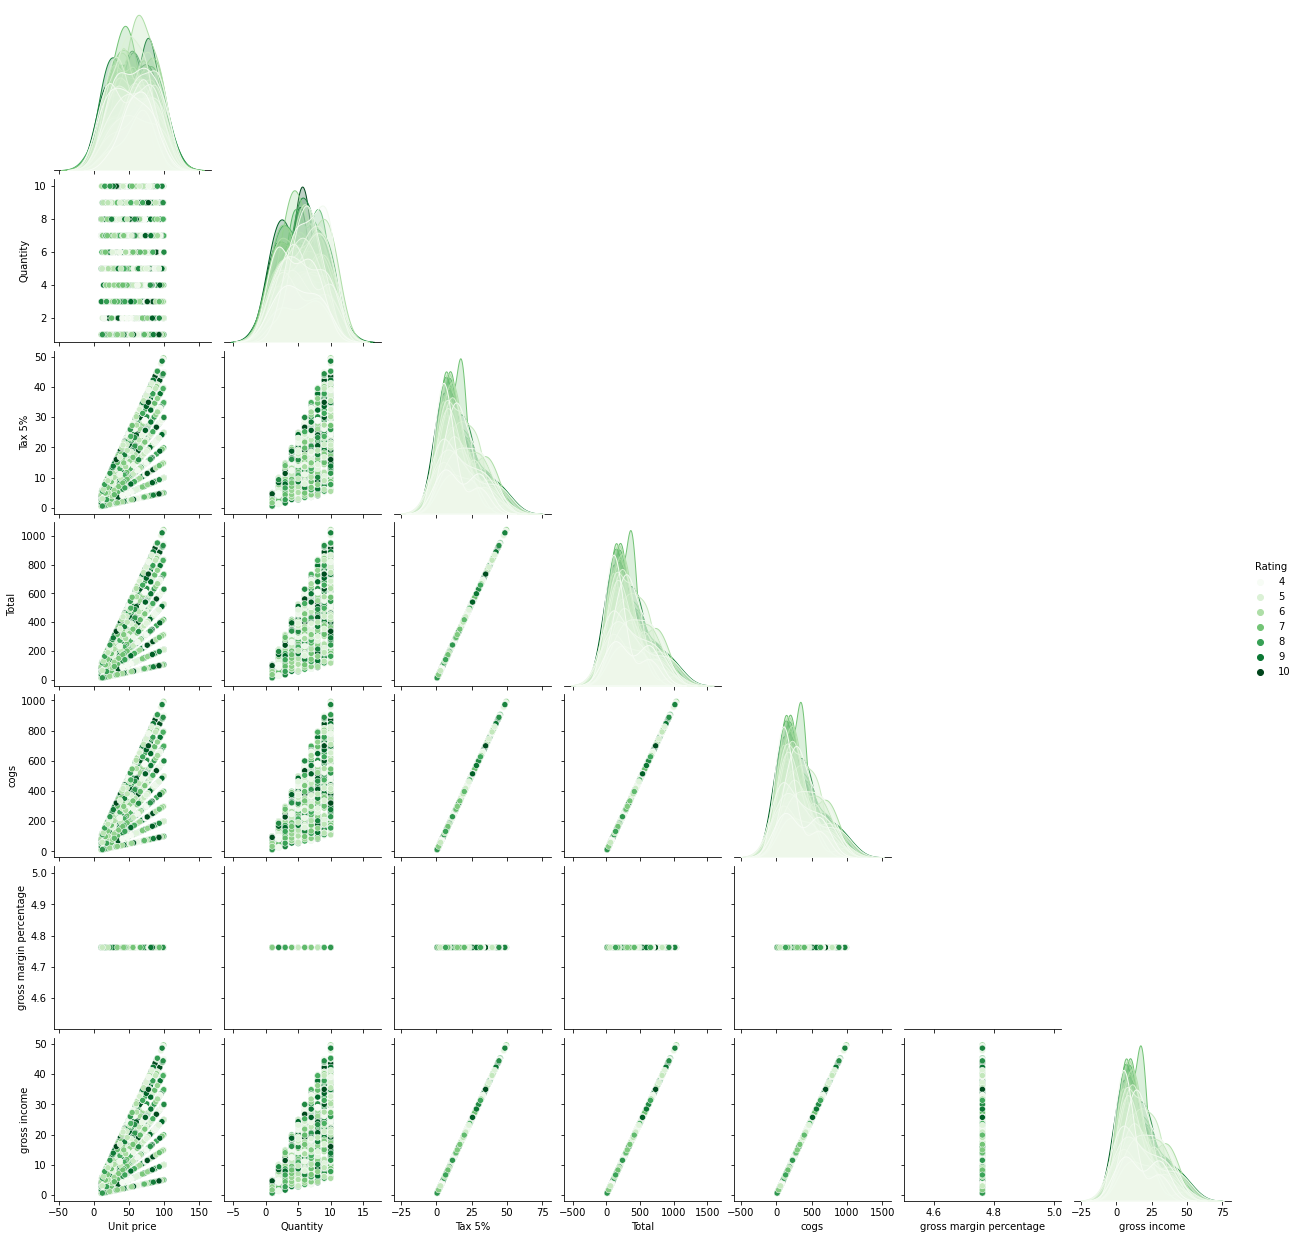

In [14]:
sns.pairplot(sales_df[num_columns].sample(1000),hue='Rating',diag_kind='kde',corner=True, palette='Greens')

terlihat korelasi antar kolom dari pairplot diatas

In [15]:
mandalay_df = sales_df[sales_df['City'] == "Mandalay"]
mandalay_series = mandalay_df.groupby(pd.DatetimeIndex(mandalay_df['Date']).month).mean()['Total'].rename('Average Sales Mandalay')

yangon_df = sales_df[sales_df['City'] == "Yangon"]
yangon_series = yangon_df.groupby(pd.DatetimeIndex(yangon_df['Date']).month).mean()['Total'].rename('Average Sales Yangoon')

naypyitaw_df = sales_df[sales_df['City'] == "Naypyitaw"]
naypyitaw_series = naypyitaw_df.groupby(pd.DatetimeIndex(naypyitaw_df['Date']).month).mean()['Total'].rename('Average Sales Naypyitaw')

cities_df = pd.concat([mandalay_series,yangon_series,naypyitaw_series],axis=1)
cities_df

,Average Sales Mandalay,Average Sales Yangoon,Average Sales Naypyitaw
Date,,,
1,334.919446,325.051500,331.431811
2,315.819000,317.660856,329.349825
3,308.904844,296.528516,350.934368


diatas adalah rata-rata total sales dari setiap branch dan tiap bulan

<AxesSubplot:>

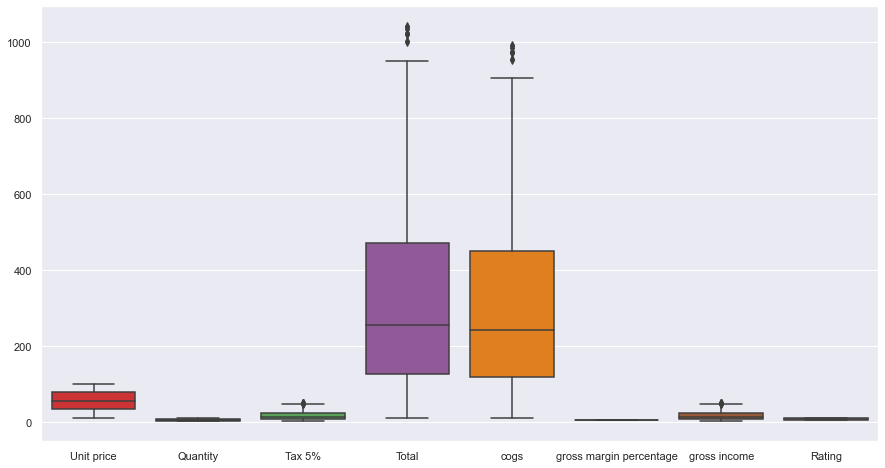

In [16]:

sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=sales_df,orient='v',palette='Set1')

melihat distribusi kolom berdatatype numbers

In [17]:
gender = sales_df.copy()
gender['female'] = sales_df['Gender'].replace(['Female','Male'],[1,0])
gender['male'] = sales_df['Gender'].replace(['Female','Male'],[0,1])
gender.drop(columns='Gender',axis=1,inplace=True)
gender.head()

,Invoice ID,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,female,male
0,750-67-8428,Yangon,Member,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,1,0
2,631-41-3108,Yangon,Normal,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,0,1
3,123-19-1176,Yangon,Member,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0,1
4,373-73-7910,Yangon,Normal,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,0,1


Menambah kolom dummy untuk Female dan male. ini digunakan untuk hypothesis testing

## Metrics logics and query

In [18]:
change = 0
city_select = "Mandalay"
month_select = "January"
def monthly_totals(city_select,month_select,sales_df):
    monthly_total = sales_df[sales_df['City'] == city_select]
    change = monthly_total.groupby(pd.DatetimeIndex(monthly_total['Date']).month).sum()['Total'].pct_change()
    monthly_total = monthly_total['Total'].sum()
    if month_select == "January":
        change = change[1]
    elif month_select == 'February':
        change = change[2]
    elif month_select == 'March':
        change = change[3]
    return monthly_total,change


diatas adalah fungsi untuk metric streamlit total bulanan

In [19]:
def monthly_costumers(city_select,month_select,sales_df):
    monthly_customer = sales_df[sales_df['City'] == city_select]
    change = monthly_customer.groupby(pd.DatetimeIndex(monthly_customer['Date']).month).count()['Total'].pct_change()
    monthly_customer = monthly_customer['Invoice ID'].count()
    if month_select == "January":
        change = change[1]
    elif month_select == 'February':
        change = change[2]
    elif month_select == 'March':
        change = change[3]
    return monthly_customer,change

monthly_costumers("Mandalay","January",sales_df)

(332, nan)

diatas adalah fungsi untuk metric streamlit jumlah customer bulanan

In [20]:
def monthly_profits(city_select,month_select,sales_df):
    monthly_profit = sales_df[sales_df['City'] == city_select]
    change = monthly_profit.groupby(pd.DatetimeIndex(monthly_profit['Date']).month).sum()['gross income'].pct_change()
    monthly_profit = monthly_profit['gross income'].sum()
    if month_select == "January":
        change = change[1]
    elif month_select == 'February':
        change = change[2]
    elif month_select == 'March':
        change = change[3]
    return monthly_profit,change

monthly_profits("Mandalay","January",sales_df)

(5057.032, nan)

diatas adalah fungsi untuk metric streamlit profit bulanan

In [21]:
total_costumer = sales_df['Invoice ID'].count()
change = sales_df.groupby(pd.DatetimeIndex(sales_df['Date']).month).count()['Invoice ID'].pct_change().sum()
change

-0.0005906840684068992

diatas adalah code yang dijadikan fungsi di streamlit untuk metric total costumer

In [22]:
total_sales = sales_df['Total'].sum()
change = sales_df.groupby(pd.DatetimeIndex(sales_df['Date']).month).sum()['Total'].pct_change().sum()
change

-0.03814434195328664

diatas adalah code yang dijadikan fungsi di streamlit untuk metric total sales

In [23]:
total_profit = sales_df['gross income'].sum()
change_p = sales_df.groupby(pd.DatetimeIndex(sales_df['Date']).month).sum()['gross income'].pct_change().sum()
change_p

-0.03814434195328664

diatas adalah code yang dijadikan fungsi di streamlit untuk metric total profit

In [24]:
total_rating = sales_df['Rating'].mean()
change_r = sales_df.groupby(pd.DatetimeIndex(sales_df['Date']).month).sum()['Rating'].pct_change().sum()
total_rating

6.972700000000003

diatas adalah code yang dijadikan fungsi di streamlit untuk metric total rating

In [25]:
best_branch = sales_df.groupby(sales_df['City']).sum()[['Total']].sort_values(by='Total',ascending=False)
best_branch[0:1].index
ratio = best_branch[0:1] / best_branch.sum()
ratio['Total']

City
Naypyitaw    0.342353
Name: Total, dtype: float64

diatas adalah code yang dijadikan fungsi di streamlit untuk metric best branch

In [26]:
best_branch = sales_df[['City','Total']]
best_branch = best_branch.groupby(best_branch['City']).sum().sort_values(by='Total',ascending=False)
total_branch = best_branch['Total'][0]
total_branch

110568.7065

diatas adalah code yang dijadikan fungsi di streamlit untuk metric diatas best branch untuk total revenue nya

## Data Visualisation

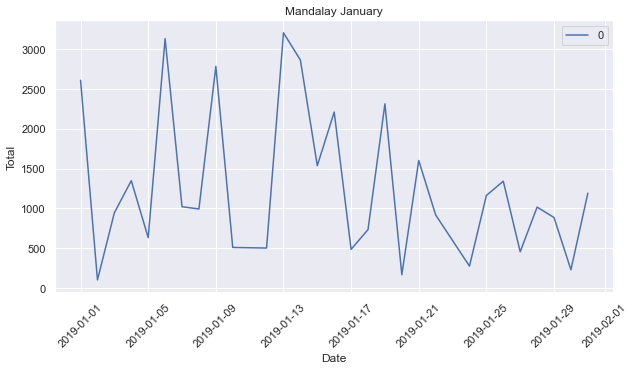

In [27]:
city_select = "Mandalay" #tuple(sales_df['City'].unique())
month_select = "January"


def select_revenue(city_select,month_select,sales_df):
    if city_select == 'Mandalay':
        graph_x = sales_df[sales_df['City'] == "Mandalay"]
        graph_y = graph_x['Total']
    elif city_select == 'Yangon':
        graph_x = sales_df[sales_df['City'] == "Yangon"]
        graph_y = graph_x['Total']
    elif city_select == 'Naypyitaw':
        graph_x = sales_df[sales_df['City'] == "Naypyitaw"]
        graph_y = graph_x['Total']
    else:
        graph_x = sales_df
        graph_y = graph_x['Total']
        city_select = 'All'

    if month_select == "January":
        graph_x = graph_x[pd.DatetimeIndex(graph_x['Date']).month == 1]
        graph_y = graph_x['Total']
        time = pd.DatetimeIndex(graph_x['Date']).unique()
        data = graph_x  
    elif month_select == "February":
        graph_x = graph_x[pd.DatetimeIndex(graph_x['Date']).month == 2]
        graph_y = graph_x['Total']
        time = pd.DatetimeIndex(graph_x['Date']).unique()
        data = graph_x
    elif month_select == "March":
        graph_x = graph_x[pd.DatetimeIndex(graph_x['Date']).month == 3]
        graph_y = graph_x['Total']
        time = pd.DatetimeIndex(graph_x['Date']).unique()
        data = graph_x
    else:
        graph_x = graph_x
        graph_y = graph_x['Total']
        time = pd.DatetimeIndex(graph_x['Date']).unique()
        data=graph_x

    data = data.groupby(pd.DatetimeIndex(data['Date']).day).sum()
    graph_y = data['Total']

    if city_select == 'All':
        hues = data['City']
    elif city_select == 'Mandalay' or city_select == 'Yangon' or city_select == 'Naypyitaw':
        hues = 0
        
   
    return data,time,graph_y,hues



fig1,axes1 = plt.subplots(figsize=(10,5))
plt.title(f'{city_select} {month_select}')
sns.lineplot(data=select_revenue(city_select,month_select,sales_df)[0], 
             x=select_revenue(city_select,month_select,sales_df)[1], 
             y=select_revenue(city_select,month_select,sales_df)[2], 
             hue=select_revenue(city_select,month_select,sales_df)[3])
plt.xticks(rotation=45)                    
plt.show()

diatas adalah visualisasi grafik total sales  per branch bulanan yang menggunakan seaborn

In [28]:
def select_plotly(city_select,month_select,sales_df):
    if city_select == 'Mandalay':
        graph_x = sales_df[sales_df['City'] == "Mandalay"]
        graph_y = graph_x['Total']
    elif city_select == 'Yangon':
        graph_x = sales_df[sales_df['City'] == "Yangon"]
        graph_y = graph_x['Total']
    elif city_select == 'Naypyitaw':
        graph_x = sales_df[sales_df['City'] == "Naypyitaw"]
        graph_y = graph_x['Total']
    else:
        graph_x = sales_df
        graph_y = graph_x['Total']
        city_select = 'All'
        data = graph_x

    if month_select == "January":
        graph_x = graph_x[pd.DatetimeIndex(graph_x['Date']).month == 1]
        data = graph_x
        graph_x = graph_x.groupby(pd.DatetimeIndex(graph_x['Date'])).sum()
        graph_y = graph_x['Total']
        time = pd.DatetimeIndex(data['Date']).unique().sort_values()

    elif month_select == "February":
        graph_x = graph_x[pd.DatetimeIndex(graph_x['Date']).month == 2]
        data = graph_x
        graph_x = graph_x.groupby(pd.DatetimeIndex(graph_x['Date']).day).sum()
        graph_y = graph_x['Total']
        time = pd.DatetimeIndex(data['Date']).unique().sort_values()
        
    elif month_select == "March":
        graph_x = graph_x[pd.DatetimeIndex(graph_x['Date']).month == 3]
        data = graph_x
        graph_x = graph_x.groupby(pd.DatetimeIndex(graph_x['Date']).day).sum()
        graph_y = graph_x['Total']
        time = pd.DatetimeIndex(data['Date']).unique().sort_values()

    else:
        data = graph_x
        graph_x = data.groupby(data['City']).sum()
        graph_y = data.groupby(pd.DatetimeIndex(data['Date'])).sum()['Total']
        time = pd.DatetimeIndex(data['Date']).unique().sort_values()

    return data,time,graph_y


In [29]:
city_select = "Yangon" 
month_select = "March"
fig1 = px.line(select_plotly(city_select,month_select,sales_df)[0], 
              x=select_plotly(city_select,month_select,sales_df)[1], 
              y=select_plotly(city_select,month_select,sales_df)[2],
              title=f'{city_select} {month_select}')
fig1.show()

diatas adalah visualisasi grafik total sales  per branch bulanan yang menggunakan plotly

<AxesSubplot:xlabel='City', ylabel='count'>

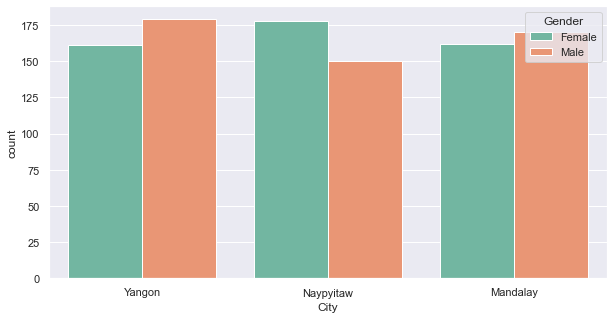

In [30]:
fig2 , axes2 = plt.subplots(figsize=(10,5))
sns.countplot(x=sales_df['City'],hue=sales_df['Gender'], data=sales_df, ax=axes2,palette="Set2")

diatas adalah visualisasi demografi branch kota dengan gendernya

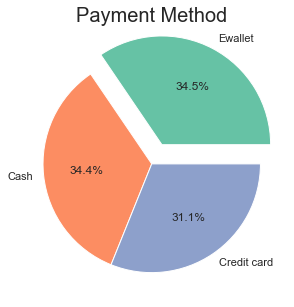

In [31]:
fig3 , axes3 = plt.subplots(figsize=(5,5))
payment_pie = sales_df['Payment'].value_counts()
colors = sns.color_palette('Set2')
explode = [0.2,0,0]
plt.title('Payment Method',fontsize=20)
plt.pie(payment_pie,colors=colors,labels=payment_pie.index,explode=explode, autopct = '%0.1f%%')
plt.show()

diatas adalah demografi cara melakukan pembayarannya

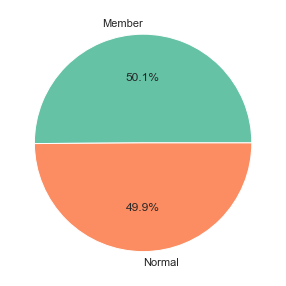

In [32]:
fig4 , axes4 = plt.subplots(figsize=(5,5))
customer_pie = sales_df['Customer type'].value_counts()
colors = sns.color_palette('Set2')
plt.pie(customer_pie,colors=colors,labels=customer_pie.index, autopct = '%0.1f%%')
plt.show()

diatas adalah demografi costumer member dan non member

Average Rating: 7.027058823529413


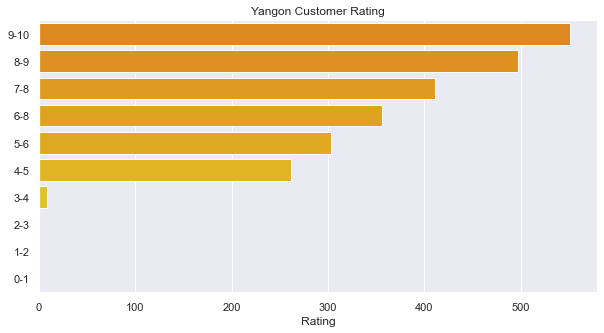

In [33]:
city_radio = "Yangon"
def rating(city_radio,sales_df):
    if city_radio == "Mandalay":
        city_rating = sales_df[sales_df['City'] == "Mandalay"]
        rating= city_rating.groupby(pd.cut(city_rating["Rating"], np.arange(0, 11, 1))).sum()['Rating'].sort_values(ascending=False)
        rating.set_axis(['9-10','8-9','7-8','6-8','5-6','4-5','3-4','2-3','1-2','0-1'], axis='index',inplace=True)
        average_rating = city_rating['Rating'].mean()
    elif city_radio == "Yangon":
        city_rating = sales_df[sales_df['City'] == "Yangon"]
        rating= city_rating.groupby(pd.cut(city_rating["Rating"], np.arange(0, 11, 1))).sum()['Rating'].sort_values(ascending=False)
        rating.set_axis(['9-10','8-9','7-8','6-8','5-6','4-5','3-4','2-3','1-2','0-1'], axis='index',inplace=True)
        average_rating = city_rating['Rating'].mean()
    elif city_radio == "Naypyitaw":
        city_rating = sales_df[sales_df['City'] == "Naypyitaw"]
        rating= city_rating.groupby(pd.cut(city_rating["Rating"], np.arange(0, 11, 1))).sum()['Rating'].sort_values(ascending=False)
        rating.set_axis(['9-10','8-9','7-8','6-8','5-6','4-5','3-4','2-3','1-2','0-1'], axis='index',inplace=True)
        average_rating = city_rating['Rating'].mean()
    elif city_radio == "All":
        city_rating = sales_df
        rating= city_rating.groupby(pd.cut(city_rating["Rating"], np.arange(0, 11, 1))).sum()['Rating'].sort_values(ascending=False)
        rating.set_axis(['9-10','8-9','7-8','6-8','5-6','4-5','3-4','2-3','1-2','0-1'], axis='index',inplace=True)
        average_rating = city_rating['Rating'].mean()
    
    return rating,average_rating

fig5,axes5 = plt.subplots(figsize=(10,5))
plt.title(f'{city_radio} Customer Rating')
sns.barplot(x=rating(city_radio,sales_df)[0],y=rating(city_radio,sales_df)[0].index,orient='h',palette='Wistia_r',ax=axes5)
print(f'Average Rating: {rating(city_radio,sales_df)[1]}')

diatas adalah fungsi untuk visualisasi rating

<AxesSubplot:xlabel='Product line'>

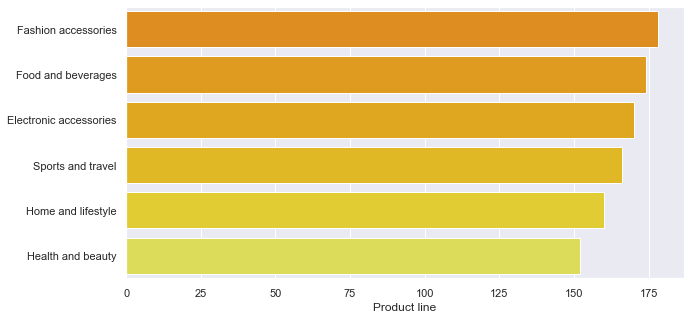

In [34]:
fig6, axes6 = plt.subplots(figsize=(10,5))
product_viz = sales_df['Product line'].value_counts()
sns.barplot(x=product_viz,y=product_viz.index,orient='h',palette='Wistia_r',ax=axes6)

diatas adalah visualisasi product line berdasarkan jumlah item terjual

## Hypothesis Testing

---

### Hypothesis 1
Claim 

Meskipun tren pendapatan menurun, ada kesamaan dalam penjualan rata-rata di setiap bulan
- H0 : rata-rata penjualan bulan Januari, Februari, dan Maret adalah sama
- H1 : minimal satu dari rata-rata penjualan bulan Januari, Februari, dan Maret tidak sama dengan yang lain


In [35]:
january_h3 = sales_df[pd.DatetimeIndex(sales_df['Date']).month == 1]['Total']
february_h3 = sales_df[pd.DatetimeIndex(sales_df['Date']).month == 2]['Total']
march_h3 = sales_df[pd.DatetimeIndex(sales_df['Date']).month == 3]['Total']

print('Average sales in January:',january_h3.mean())
print('Average sales in February:',february_h3.mean())
print('Average sales in March:',march_h3.mean())

Average sales in January: 330.37462500000015
Average sales in February: 320.8560198019801
Average sales in March: 317.2623391304349


<AxesSubplot:>

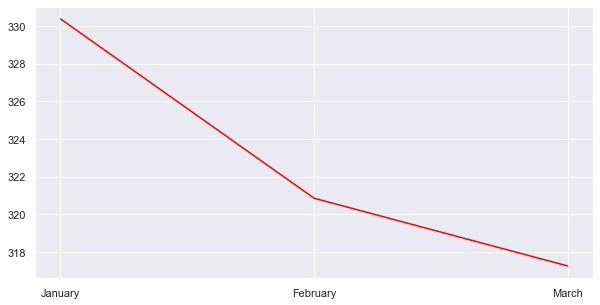

In [36]:
fig01,axes01 = plt.subplots(figsize=(10,5))
sns.lineplot(x=['January','February','March'],y=[january_h3.mean(),february_h3.mean(),march_h3.mean()],color='red',ax=axes01)

In [37]:
f_stat,p_value = stats.f_oneway(january_h3,february_h3,march_h3)
print('P-value:',p_value)

P-value: 0.7685149658919843


Menggunakan Uji Annova

nilai p = 0,7685149658919843

p-value > 0,05 kita gagal menolak H0 dimana rata-rata penjualan bulan Januari, Februari, dan Maret adalah sama,
oleh karena itu, kita dapat menolak H1 dan menyimpulkan bahwa rata-rata penjualan pada bulan Januari, Februari, dan Maret adalah sama secara signifikan.

Artinya, penjualan di bulan Januari, Februari, dan Maret tidak turun signifikan.

Tapi ini menyebabkan stagnasi dalam penjualan, jika kita ingin meningkatkan penjualan, kita perlu melakukan sesuatu.

### Hypothesis 2

Ada korelasi antara product line dan jenis kelamin untuk keputusan pengambilan pembelian
- H0 : product line tidak bergantung pada jenis kelamin.
- H1 : product line tergantung dari jenis kelamin.

In [38]:
gender['female'] = sales_df['Gender'].replace(['Female','Male'],[1,0])
gender['male'] = sales_df['Gender'].replace(['Female','Male'],[0,1])
product = gender.copy()
product = product.groupby(product['Product line']).sum()[['female','male']]
product

,female,male
Product line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


In [39]:
stat, p, dof, expected = stats.chi2_contingency(product)
print(f'p = {p}')
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p = 0.331883858055391
Probably independent


menggunakan uji Chi Square

nilai p = 0.331883858055391

p-value > 0,05 kita gagal menolak H0 dimana Product line tidak bergantung pada jenis kelamin.
oleh karena itu, kita dapat menolak H1 dan menyimpulkan bahwa Product line dan jenis kelamin independen secara signifikan .

kita bisa menyarankan ke Departemen Produk agar dapat menciptakan produk tanpa banyak memikirkan
klasifikasi jenis kelamin. karena kedua jenis kelamin secara signifikan tidak ada korelasinya terhadap Product line.

#### V. Summary
---

- Hasil dari tes menyimpulkan bahwa rata-rata penjualan pada bulan Januari, Februari, dan Maret adalah sama secara signifikan. Artinya, penjualan di bulan Januari, Februari, dan Maret tidak turun signifikan.
- Hasil dari tes menyimpulkan bahwa kita dapat menolak H1 dan menyimpulkan bahwa Product line dan jenis kelamin independen secara signifikan.


> hasil dari hipotsis 1 Ini menunjukan stagnasi dalam penjualan, jika kita ingin meningkatkan penjualan, kita perlu melakukan sesuatu. salah satunya adalah kita bisa menyarankan ke Departemen Produk agar dapat menciptakan produk tanpa banyak memikirkan klasifikasi jenis kelamin. karena kedua jenis kelamin secara signifikan tidak ada korelasinya terhadap Product line.

#### VI. Reference

---

[1] MEMBUAT APLIKASI WEB SAINS DATA DENGAN MUDAH MENGGUNAKAN STREAMLIT, 2022, Retrieved From https://informatics.uii.ac.id/2021/03/15/streamlit-membuat-aplikasi-web-sains-data/#:~:text=Streamlit%20adalah%20sebuah%20framework%20berbasis,dan%20machine%20learning%20yang%20interaktif%20.